In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt 
import scipy

In [2]:
y, sr = librosa.load('geiger_data/e0808cf0.wav')
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)

/home/herman/bin/sage/sage/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/librosa/core/intervals.py:15: DeprecationWarning: path is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  with resources.path("librosa.core", "intervals.msgpack") as imsgpack:
/home/herman/bin/sage/sage/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/audioread/rawread.py:16: DeprecationWarning: 'aifc' is deprecated and slated for removal in Python 3.13
  import aifc
/home/herman/bin/sage/sage/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/audioread/rawread.py:17: DeprecationWarning: 'audioop' is deprecated and slated for removal in Python 3.13
  import audioop
/home/herman/bin/sage/sage/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/audioread/rawread.py:19: DeprecationWarning: 'sunau' is deprecated and slated for removal in Python 3.13
 

[0.13931973 0.27863946 0.53405896 0.85913832 1.13777778 1.30031746
 1.46285714 1.76471655 2.08979592 2.36843537 2.53097506 2.69351474
 2.85605442 3.18113379 3.45977324 3.62231293 3.78485261 3.94739229
 4.10993197 4.36535147 4.43501134 4.69043084 4.96907029 5.13160998
 5.29414966 5.45668934 5.7353288  5.89786848]


In [14]:
len(y)/sr

5.944308390022676

In [3]:
peaks,heights = scipy.signal.find_peaks(y[:sr], height=.4, threshold=None, distance=300, prominence=None, width=None, wlen=None, rel_height=0.5, plateau_size=None)
peak_times = [p/sr for p in peaks]
peak_times

[0.12766439909297053,
 0.2527437641723356,
 0.5170068027210885,
 0.5736961451247166,
 0.8464852607709751,
 0.8625396825396825,
 0.8876643990929706]

ValueError: x and y must have same first dimension, but have shapes (57,) and (8,)

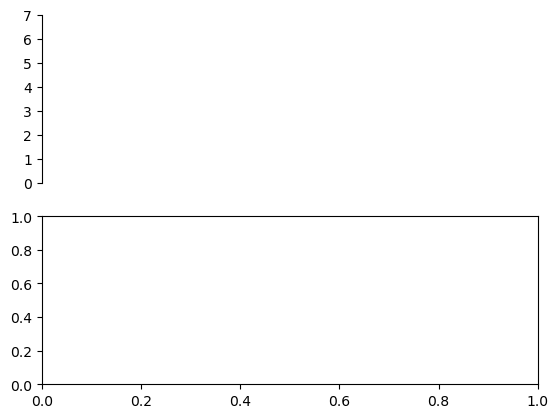

In [15]:
signal = y[:sr]
time = np.linspace(0, len(signal) / sr, num=len(signal))
fig, ax = plt.subplots(nrows=2)

ax[0].spines['right'].set_color('none')
ax[0].yaxis.tick_left()
ax[0].spines['bottom'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.tick_bottom()
ax[0].xaxis.set_visible(False)
ax[0].set_yticks(np.arange(0, 8))
ax[0].step(peak_times+[1],range(8))
ax[0].set_xlim(left=0,right=1)
ax[0].set_title('N(t)')

ax[1].set_xlim(left=0,right=1)
ax[1].spines['right'].set_color('none')
ax[1].yaxis.tick_left()
ax[1].spines['left'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.tick_bottom()
ax[1].yaxis.set_visible(False)
ax[1].minorticks_on()
ax[1].plot(time,signal,linewidth=.5)
ax[1].vlines(peak_times,-.65,.65,color='red',alpha=1,linestyle=':')
ax[1].set_title('Audio data')
plt.savefig('geiger_img.pdf')

In [85]:
y, sr = librosa.load('geiger_data/e0808d39.wav')

In [87]:
npeaks = len(peak_times)
total_time=len(y)/sr
print(total_time,npeaks,npeaks/total_time)

3.709387755102041 30 8.087588028169014


In [92]:
peaks,heights = scipy.signal.find_peaks(y, height=.3, threshold=None, distance=300, prominence=None, width=None, wlen=None, rel_height=0.5, plateau_size=None)
peak_times = [p/sr for p in peaks]
peak_times

[0.2417233560090703,
 0.4801360544217687,
 0.6420408163265307,
 0.7657596371882086,
 1.0173696145124718,
 1.0480725623582767,
 1.0776417233560092,
 1.2583219954648526,
 1.3834013605442177,
 1.640861678004535,
 1.6975510204081632,
 1.970657596371882,
 1.9863945578231292,
 2.0115192743764174,
 2.247301587301587,
 2.4102947845804987,
 2.4267573696145126,
 2.4537414965986395,
 2.574739229024943,
 2.735918367346939,
 2.7787755102040816,
 2.796235827664399,
 2.8191836734693876,
 2.8411791383219955,
 3.023265306122449,
 3.186031746031746,
 3.227256235827664,
 3.2989115646258504,
 3.315827664399093,
 3.4835827664399095,
 3.6486167800453515]

In [93]:
print("$n$ &", " & ".join(str(k) for k in range(1,len([t for t in peak_times if t<1.5])+1)))
print("$C_n$ &"," & ".join(str(round(t,3)) for t in peak_times if t<1.5))
trim = [0]+[t for t in peak_times if t<1.5]
diff = [trim[i+1]-trim[i] for i in range(len(trim)-1)]
print("$T_n$ &"," & ".join(str(round(t,3)) for t in diff))

$n$ & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9
$C_n$ & 0.242 & 0.48 & 0.642 & 0.766 & 1.017 & 1.048 & 1.078 & 1.258 & 1.383
$T_n$ & 0.242 & 0.238 & 0.162 & 0.124 & 0.252 & 0.031 & 0.03 & 0.181 & 0.125


In [94]:
print(min(diff))
print(max(diff))

0.029569160997732435
0.25160997732426316


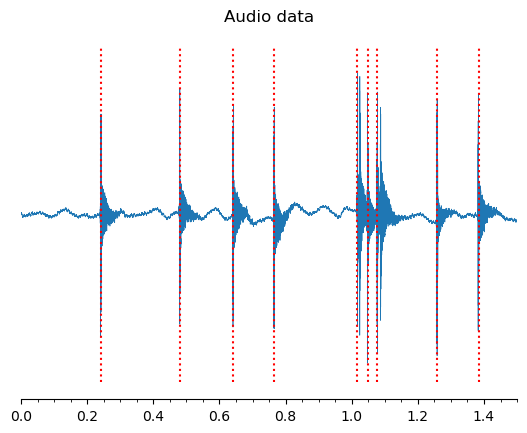

In [122]:
signal = y[:round(1.5*sr)]
time = np.linspace(0, len(signal) / sr, num=len(signal))
fig, ax = plt.subplots(nrows=1)

ax.set_xlim(left=0,right=len(signal)/sr)
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
ax.yaxis.set_visible(False)
ax.minorticks_on()
ax.plot(time,signal,linewidth=.5)
ax.vlines(peak_times,-.65,.65,color='red',alpha=1,linestyle=':')
ax.set_title('Audio data')
plt.savefig("geiger_img_2.pdf")

In [123]:
T = RealDistribution('exponential', (1/9)/1.5)
F = T.cum_distribution_function
F(max(diff))-F(min(diff))

0.6373850474674568

In [49]:
factorial(12)

479001600

In [53]:
lam^(12) * e^(-lam)

9.99999999999900e-157

In [121]:
T = RealDistribution('exponential', 1/2)
F = T.cum_distribution_function
F(1)

0.8646647167633873

In [119]:
RR(1-e^(-2))

0.864664716763387